<a href="https://colab.research.google.com/github/clementsiegrist/Face_maskDetection/blob/main/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# https://www.kaggle.com/prekshabhavsar/face-mask-detection-with-92-accuracy
data_folder = '/content/drive/MyDrive/Data' #Change this path!!
root_folder = '/content/drive/MyDrive'

Mounted at /content/drive


In [3]:
!pip install xmltodict

import os
import cv2
import matplotlib.pyplot as plt
import xmltodict
import random
from os import listdir
from os.path import isfile, join
import torchvision 
import torch 
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import all modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

import tensorflow as tf
import cv2
import glob
from tqdm import tqdm
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

Preparing data..:   0%|          | 0/853 [00:00<?, ?it/s]

Image path = /content/drive/MyDrive/Data/images
Total number of images : 853
Annotation path = /content/drive/MyDrive/Data/annotations
Total Annotation files are 853
['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss

Preparing data..: 100%|██████████| 853/853 [08:54<00:00,  1.59it/s]


(4072, 80, 80, 3)
(4072, 3)
(3257, 80, 80, 3)
(3257, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 96)        55392     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       110720    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 107s 2s/step - loss: 0.5912 - accuracy: 0.7489 - val_loss: 0.2218 - val_accuracy: 0.9288
Epoch 2/20
50/50 [==============================] - 105s 2s/step - loss: 0.2515 - accuracy: 0.9238 - val_loss: 0.2322 - val_accuracy: 0.9288
Epoch 3/20
50/50 [==============================] - 102s 2s/step - loss: 0.2793 - accuracy: 0.9157 - val_loss: 0.2355 - val_accuracy: 0.9264
Epoch 00003: early stopping


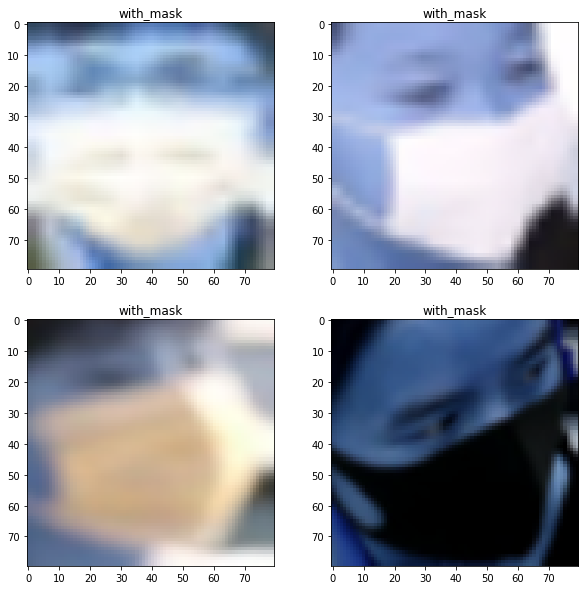

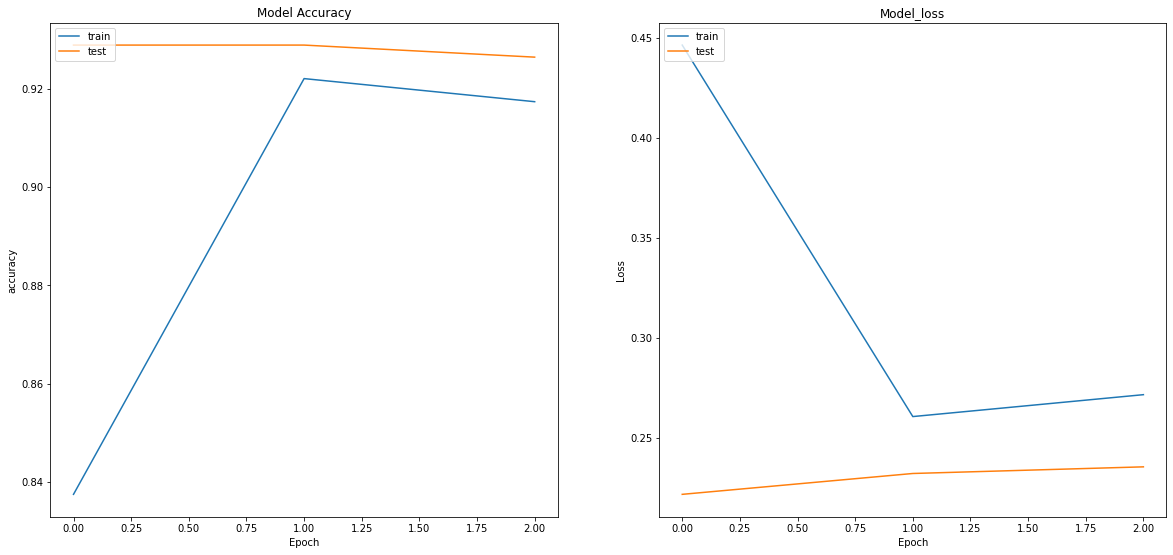

In [6]:
#print(os.listdir(Dir))
images_path = '/content/drive/MyDrive/Data/images'
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = '/content/drive/MyDrive/Data/annotations'
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))

Image_width = 80
Image_height = 80
Image_array = []
Labels = []

#Check label files are according to images files
Sorted_files = sorted(os.listdir(Annotation_path))
print(Sorted_files)
Sorted_images_path = sorted(os.listdir(images_path))
print(Sorted_images_path)

# Prepare data and respective labels
def get_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]


for file in tqdm(sorted(os.listdir(Annotation_path)),desc='Preparing data..'):

    file_path = Annotation_path + "/" + file
    xml = ET.parse(file_path)
    root = xml.getroot()
    image_path = images_path + "/" + root[1].text

     
    for bndbox in root.iter('bndbox'):

        [xmin, ymin, xmax, ymax] = get_box(bndbox)
        img = cv2.imread(image_path)
        face_img = img[ymin:ymax,xmin:xmax]
        face_img  = cv2.resize(face_img,(Image_width,Image_height))
        Image_array.append(np.array(face_img)) 
    
    for obj in root.findall('object'):

        name = obj.find('name').text 
        Labels.append(np.array(name)) 
        
# Normalize the data
num_classes = 3
X = np.array(Image_array)
X = X/255

# Convert text to numerical values 
le = LabelEncoder()
y = le.fit_transform(Labels)
y  = to_categorical(y,num_classes)

#Check the total Images and label length are equal 
print(X.shape)
print(y.shape)

#Check random images 
fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range(2):
        l = rn.randint(0,len(Labels))
        ax[i,j].imshow(Image_array[l])
        ax[i,j].set_title(Labels[l])
        
#Split the data for training and validation        
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.20,random_state = 42)
#Check the total training images
print(X_train.shape)
print(y_train.shape)  

# design model
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (Image_width,Image_height,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 96,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(3,activation = "softmax"))


Batch_size = 64
Epochs = 20
seed = 1000

#Augmented Images
train_datagen = ImageDataGenerator(
                    rotation_range = 10,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')
#Callbacks
Estop = EarlyStopping(monitor = 'val_loss',patience = 2,verbose = 1,min_delta = 0.01)
Red_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 3,verbose = 1,factor = 0.1)

#Compile the model
model.compile(optimizer = Adam(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = Batch_size),steps_per_epoch = X_train.shape[0]//Batch_size,epochs = Epochs,validation_data = (X_val,y_val),verbose=1,callbacks=[Estop])

#plot the history
def plot_model_performance(history):
    fig =plt.figure(figsize = (20,20))
    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.show()


    
plot_model_performance(history)

In [2]:
# https://www.kaggle.com/giwilorjelly/detecting-masks-and-social-distancing-violations
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance

In [15]:
face_model = cv2.CascadeClassifier('../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml')

In [17]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/drive/MyDrive/Data/images/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(img) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
plt.figure(figsize=(10,10))
plt.imshow(out_img)


error: ignored

# Abstract 


*Install and import relevant libraries and set color background and styles for nice visualization*

In [2]:
!pip install xmltodict #installing the library to read XMl files
import xmltodict

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pylab import rcParams
import os
import cv2
import matplotlib.pyplot as plt
import xmltodict
import random
from os import listdir
from os.path import isfile, join
import torchvision 
import torch 
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import all modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import tensorflow as tf
import cv2
import glob
from tqdm import tqdm
import xml.etree.ElementTree as ET
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use(['seaborn-white'])

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# **I. Exploratory Data Analysis**

Mount the drive, parse the xml files in order to get the annotations and convert the obtained datas to a panda dataframe for better visualization

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# https://www.kaggle.com/prekshabhavsar/face-mask-detection-with-92-accuracy
data_folder = '/content/drive/MyDrive/Data' #Change this path!!
root_folder = '/content/drive/MyDrive'
path_im = '/content/drive/MyDrive/Data/images/'
images_path = '/content/drive/MyDrive/Data/images'
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = '/content/drive/MyDrive/Data/annotations'
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))
path_an = '/content/drive/MyDrive/Data/annotations/'
PATH = '/content/drive/MyDrive/Data'
os.listdir(PATH)
ANNOTATIONS_PATH = os.path.join(PATH, "annotations")
IMAGE_PATH = os.path.join(PATH, "images")

data = []
sorted_annot_list = sorted(os.listdir(ANNOTATIONS_PATH), key=lambda x: int(x.split('.')[0][12:]))

for f_name in tqdm(sorted_annot_list):
    with open(os.path.join(ANNOTATIONS_PATH, f_name), 'r') as file:
        annot = xmltodict.parse(file.read())['annotation']
        if type(annot['object']) != list:
            annot['object'] = [annot['object']]
        data.append(annot)

data_df = pd.json_normalize(data)

Mounted at /content/drive
Image path = /content/drive/MyDrive/Data/images
Total number of images : 853
Annotation path = /content/drive/MyDrive/Data/annotations


  0%|          | 0/853 [00:00<?, ?it/s]

Total Annotation files are 853


100%|██████████| 853/853 [03:13<00:00,  4.41it/s]


In [5]:
data_df

folder             filename segmented  ... size.width size.height size.depth
0    images    maksssksksss0.png         0  ...        512         366          3
1    images    maksssksksss1.png         0  ...        400         156          3
2    images    maksssksksss2.png         0  ...        400         290          3
3    images    maksssksksss3.png         0  ...        400         271          3
4    images    maksssksksss4.png         0  ...        301         400          3
..      ...                  ...       ...  ...        ...         ...        ...
848  images  maksssksksss848.png         0  ...        400         268          3
849  images  maksssksksss849.png         0  ...        400         236          3
850  images  maksssksksss850.png         0  ...        400         200          3
851  images  maksssksksss851.png         0  ...        301         400          3
852  images  maksssksksss852.png         0  ...        267         400          3

[853 rows x 7 columns]

# A. Vizualize the histogram ranking the images by the number of objects detected for each images

In data_df, for each row of the 'object' column you have a certain number of list, each list corresponding to one detection. So if you have to detections, we have two list which gives us the number of instances per images

In [8]:
data_df['num_of_object'] = data_df.object.map(len)
data_df['num_of_object']

0      3
1      9
2      4
3      9
4      1
      ..
848    4
849    4
850    3
851    1
852    2
Name: num_of_object, Length: 853, dtype: int64

In [ ]:
Now let is plot the histogram of the the distribution of the number of instances per image

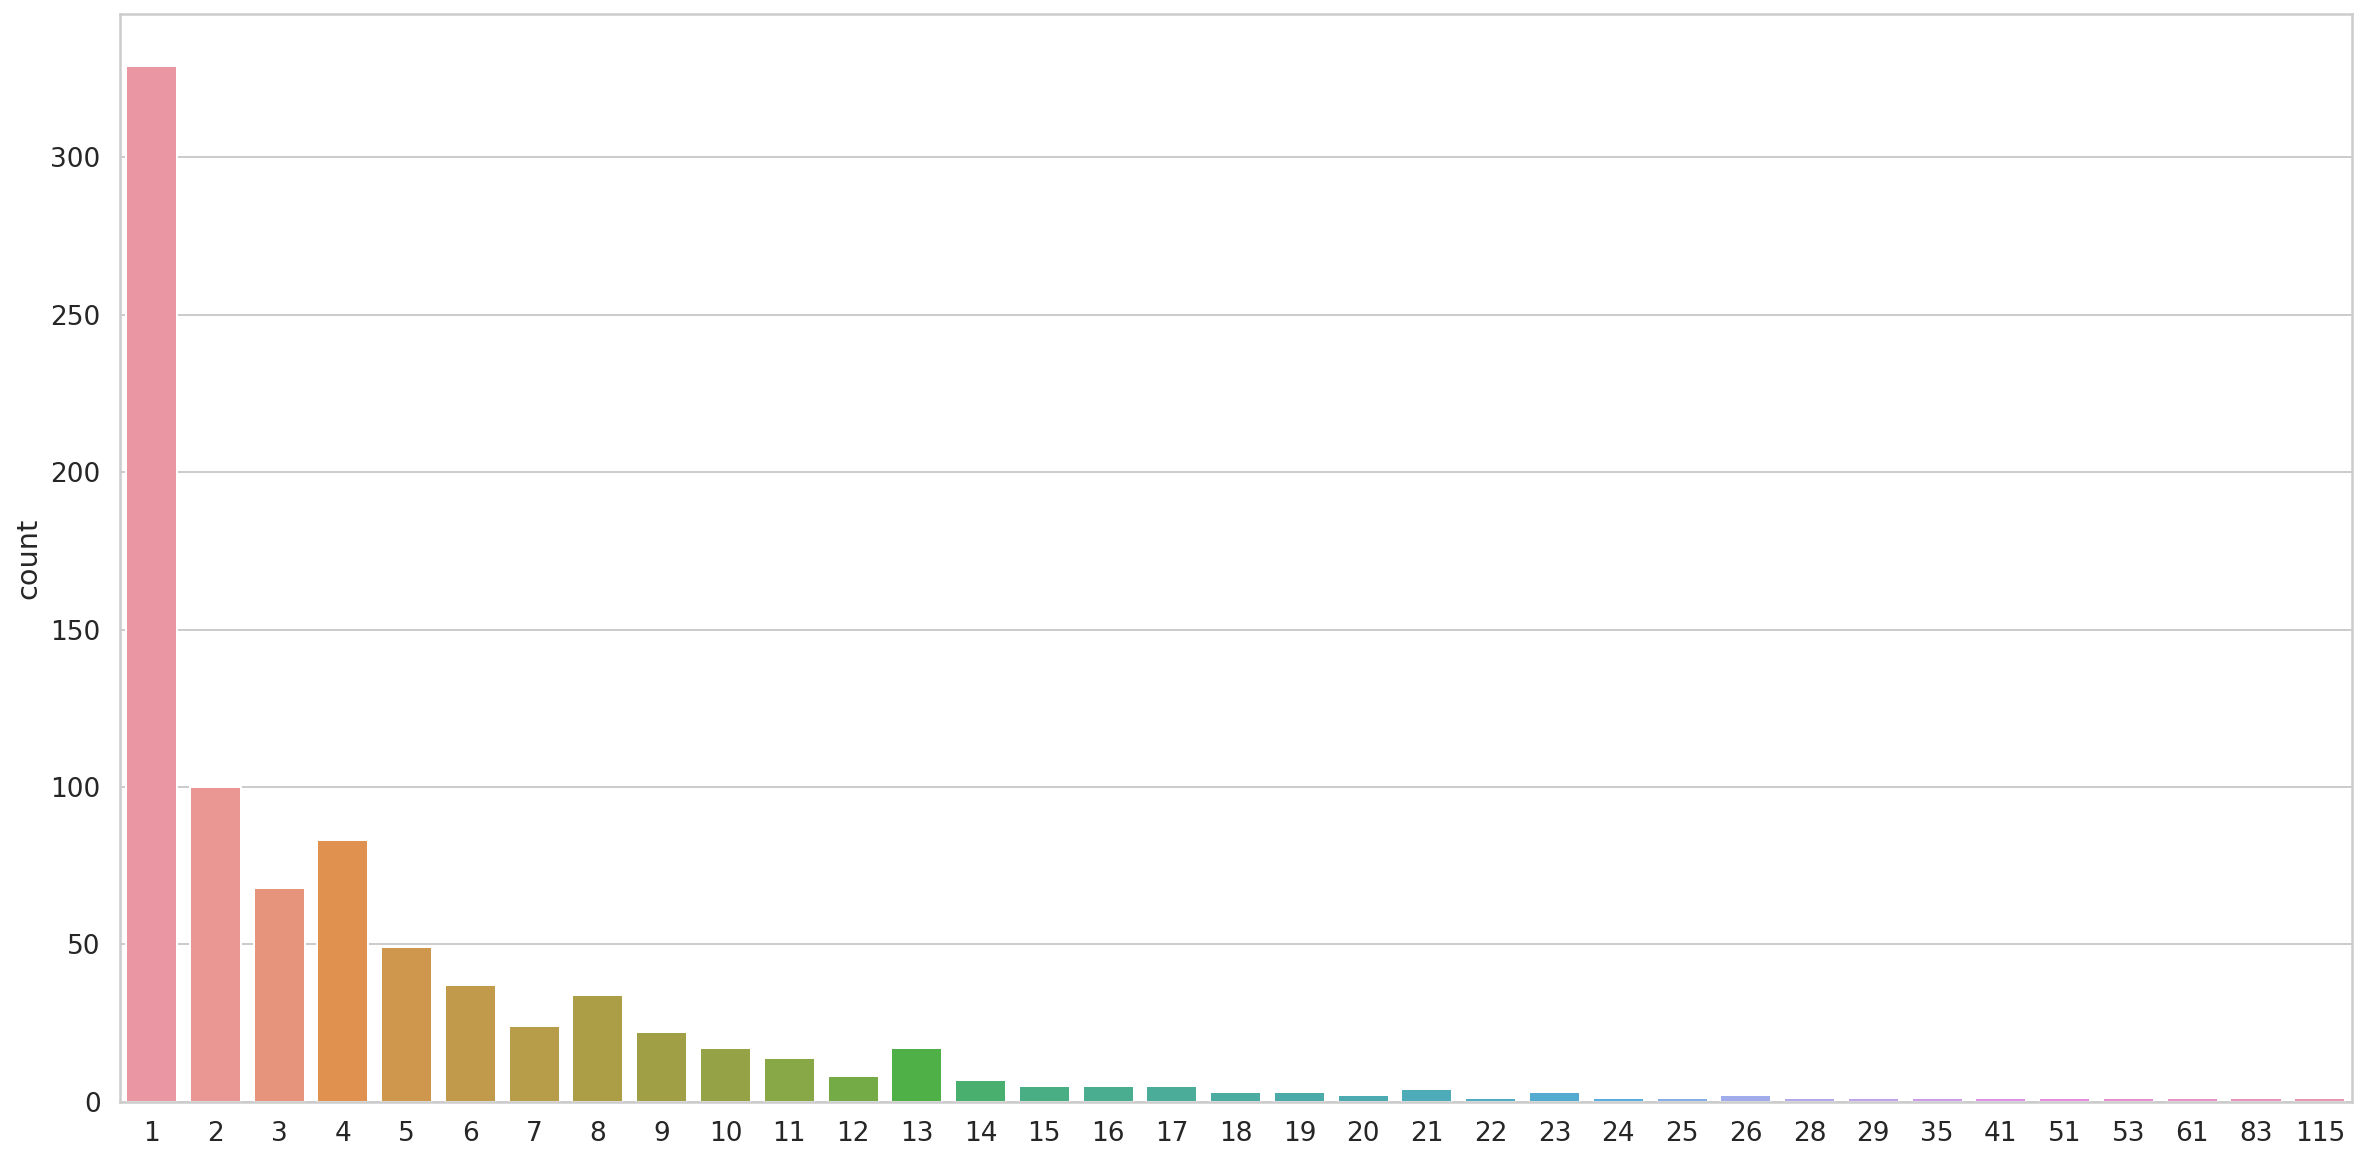

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(data_df.num_of_object.values)
plt.show()

We can see that in roughly 75% of images they are between 1 and 4 instances detected (mask badly wore, no mask or masked people). So it is possibly a first bias of the dataset though we can not draw conclusion for these informations at this stage.


Now let is created an other dataframe in order to visualize more clearly what we have
in the 'object column' which is the column we are interested in.

Now we want to know approximatively what is the number of instances per class.
What we do in first instance is to keep only the rows in which the number of instances
that should be detected is inferior to 15.

In [11]:
data_df[data_df.num_of_object <= 15].num_of_object.sum()
data_df = data_df[data_df.num_of_object <= 15]
data_df

folder             filename  ... size.depth num_of_object
0    images    maksssksksss0.png  ...          3             3
1    images    maksssksksss1.png  ...          3             9
2    images    maksssksksss2.png  ...          3             4
3    images    maksssksksss3.png  ...          3             9
4    images    maksssksksss4.png  ...          3             1
..      ...                  ...  ...        ...           ...
848  images  maksssksksss848.png  ...          3             4
849  images  maksssksksss849.png  ...          3             4
850  images  maksssksksss850.png  ...          3             3
851  images  maksssksksss851.png  ...          3             1
852  images  maksssksksss852.png  ...          3             2

[814 rows x 8 columns]

What we do here, is to create a dataframe with the exact same columns as the precendent
but with more rows, each row corresponding to one individual bounding. 
Here np.repeat the elements of an array according to the number given in the second argument. In this case, this case we give as a second argument the 'num_of_objects' columns which for each row as the corresponding number we want in order for the repetition to correspond to correspond to the number of bounding boxes per image.

In [13]:
from itertools import chain

num_object_per_images = data_df.num_of_object
print('Num of object is  :', print(num_object_per_images))

image_data = pd.DataFrame({
    'filename': np.repeat(data_df['filename'], num_object_per_images), 
    'segmented': np.repeat(data_df['segmented'], num_object_per_images), 
    'object': chain.from_iterable(data_df['object'].values), 
    'width': np.repeat(data_df['size.width'], num_object_per_images),
    'height': np.repeat(data_df['size.height'], num_object_per_images),
    'depth': np.repeat(data_df['size.depth'], num_object_per_images)
})

image_data.reset_index(inplace=True, drop=True)
objects = pd.DataFrame(image_data.object.map(dict).tolist())
data = pd.concat([image_data, objects], axis=1)
data.drop(columns='object', inplace=True)


0      3
1      9
2      4
3      9
4      1
      ..
848    4
849    4
850    3
851    1
852    2
Name: num_of_object, Length: 814, dtype: int64
Num of object is  : None


In [10]:
data

filename  ...                                             bndbox
0       maksssksksss0.png  ...  {'xmin': '79', 'ymin': '105', 'xmax': '109', '...
1       maksssksksss0.png  ...  {'xmin': '185', 'ymin': '100', 'xmax': '226', ...
2       maksssksksss0.png  ...  {'xmin': '325', 'ymin': '90', 'xmax': '360', '...
3       maksssksksss1.png  ...  {'xmin': '321', 'ymin': '34', 'xmax': '354', '...
4       maksssksksss1.png  ...  {'xmin': '224', 'ymin': '38', 'xmax': '261', '...
...                   ...  ...                                                ...
2979  maksssksksss850.png  ...  {'xmin': '146', 'ymin': '30', 'xmax': '176', '...
2980  maksssksksss850.png  ...  {'xmin': '323', 'ymin': '47', 'xmax': '351', '...
2981  maksssksksss851.png  ...  {'xmin': '66', 'ymin': '205', 'xmax': '156', '...
2982  maksssksksss852.png  ...  {'xmin': '139', 'ymin': '94', 'xmax': '198', '...
2983  maksssksksss852.png  ...  {'xmin': '92', 'ymin': '86', 'xmax': '132', 'y...

[2984 rows x 11 columns]

We drop useless column so that we have more visibility on our novel dataframe

In [14]:
data.drop(columns=['segmented','depth','truncated','occluded','difficult', 'pose'], inplace=True)
data

filename  ...                                             bndbox
0       maksssksksss0.png  ...  {'xmin': '79', 'ymin': '105', 'xmax': '109', '...
1       maksssksksss0.png  ...  {'xmin': '185', 'ymin': '100', 'xmax': '226', ...
2       maksssksksss0.png  ...  {'xmin': '325', 'ymin': '90', 'xmax': '360', '...
3       maksssksksss1.png  ...  {'xmin': '321', 'ymin': '34', 'xmax': '354', '...
4       maksssksksss1.png  ...  {'xmin': '224', 'ymin': '38', 'xmax': '261', '...
...                   ...  ...                                                ...
2979  maksssksksss850.png  ...  {'xmin': '146', 'ymin': '30', 'xmax': '176', '...
2980  maksssksksss850.png  ...  {'xmin': '323', 'ymin': '47', 'xmax': '351', '...
2981  maksssksksss851.png  ...  {'xmin': '66', 'ymin': '205', 'xmax': '156', '...
2982  maksssksksss852.png  ...  {'xmin': '139', 'ymin': '94', 'xmax': '198', '...
2983  maksssksksss852.png  ...  {'xmin': '92', 'ymin': '86', 'xmax': '132', 'y...

[2984 rows x 5 columns]

Now we count the values of the 'name' column

In [15]:
data['name'].value_counts()

with_mask                2365
without_mask              515
mask_weared_incorrect     104
Name: name, dtype: int64

In [16]:
data['name'].unique()

array(['without_mask', 'with_mask', 'mask_weared_incorrect'], dtype=object)

In [ ]:
Plot the histogram of the number of instances per class for better visualization

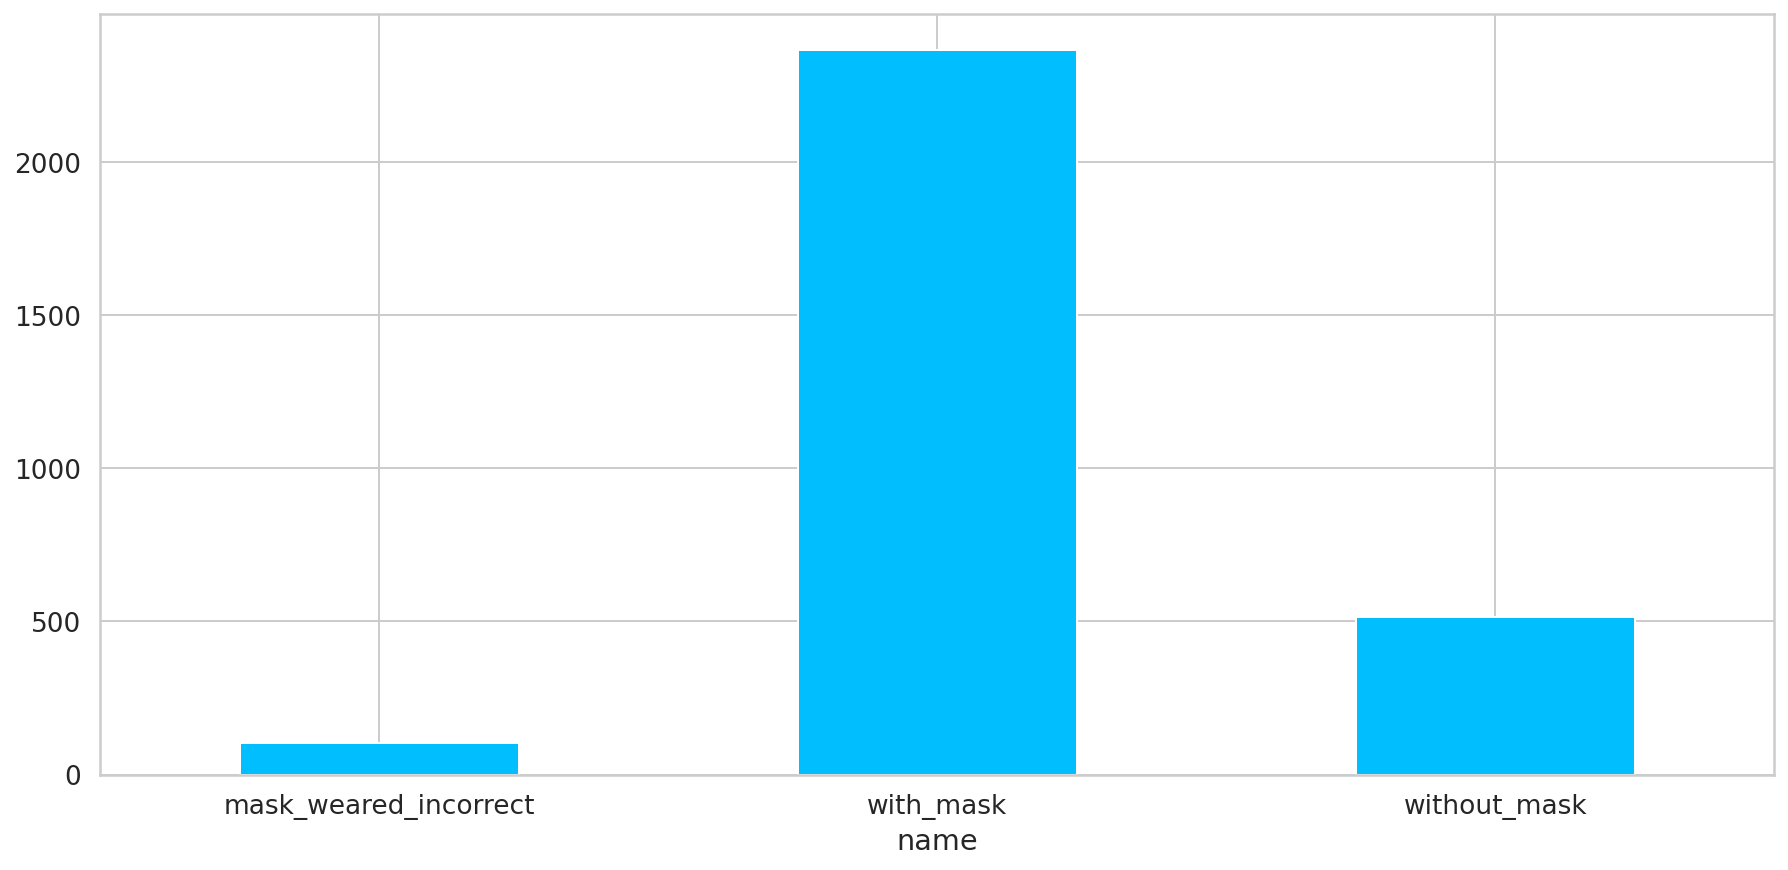

In [17]:
data.groupby('name')['filename'].count().plot.bar(figsize=(15,7), rot=0, grid=True)

# II. Loading and preparing the Dataset

We iterate over our /Data directory and store the imagenames and xmlnames. 
Then we reiterate over the previously created list and open 

In [67]:
# Read parse and store the images

imagenames=[] # list of imagefile names
xmlnames=[] # list of xmlfile names

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data'):
    for filename in filenames:
        
        if os.path.join(dirname, filename)[-3:]!="xml":
            imagenames.append(filename)
        else:
            xmlnames.append(filename)

listing=[]

for i in imagenames[:]:
    with open(path_an+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])

for i in set(listing):
    print(i)

print('length listing', len(listing))
print(listing)
from collections import Counter

a = dict(Counter(listing))
print(a)
index = np.arange(0, len(listing))
df = pd.Series(listing)
df = df.str.get_dummies()

mask_weared_incorrect
without_mask
with_mask
length listing 4072
['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'with_mask', 'mask_weared_incorr

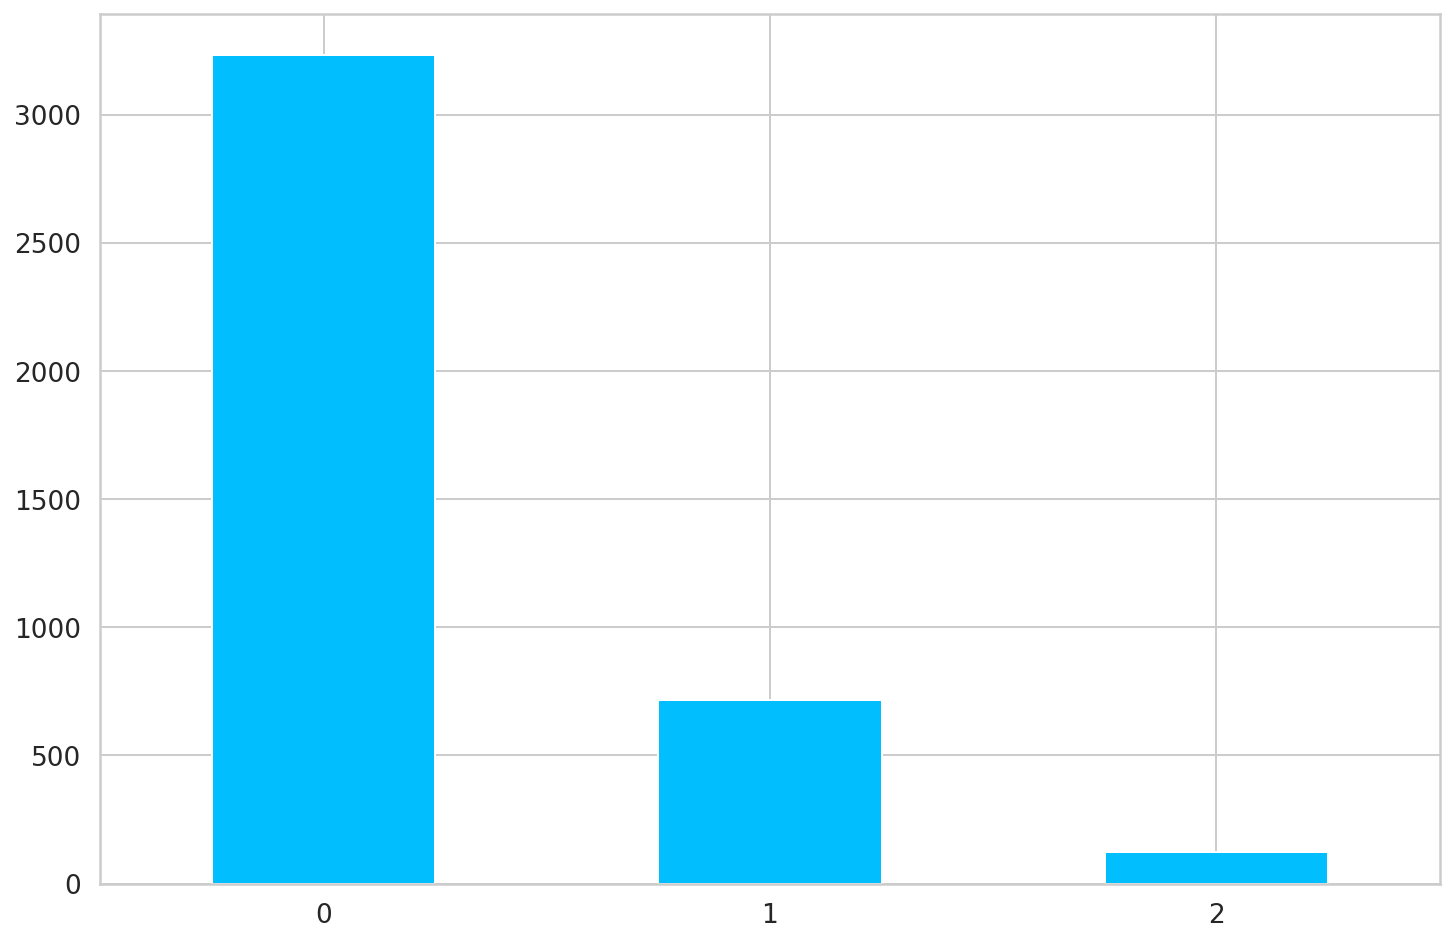

In [94]:
df.index
data_count = df.value_counts().plot.bar(rot=0, xticks=(0, 1, 2), xlabel=('good, badly, no mask wore'), use_index=False)

0 = with_mask

1 =  mask_weared_incorrect

2 = without_mask

This time we plotted the histogram of the number of instances per class but for every instances and found roughly the same proportion than in the previous histogram that was plot based on a filter. 





# **II A. Dataset Visualization and Preparation**

Now we visualize a sample of the dataset

In [96]:
# mapping for predictions and analysis purpose
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

# function to visualize images
def draw_bounding_box(input_image):

    with open(path_an+input_image[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_im+input_image))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]

    if type(temp)==list:
        for i in range(len(temp)):

            if temp[i]["name"]=="with_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='g',facecolor="none",)
                ax.add_patch(patch)

            if temp[i]["name"]=="without_mask":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))     
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='r',facecolor="none",)
                ax.add_patch(patch)
                
            if temp[i]["name"]=="mask_weared_incorrect":
                a,b,c,d=list(map(int,temp[i]["bndbox"].values()))
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=1, edgecolor='y',facecolor="none",)
                ax.add_patch(patch)
    else:
        a,b,c,d=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"g","mask_weared_incorrect":"y"}
        patch=patches.Rectangle((a,b),d-b,c-a,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(patch)

Use the previous function in order to plot 10 images

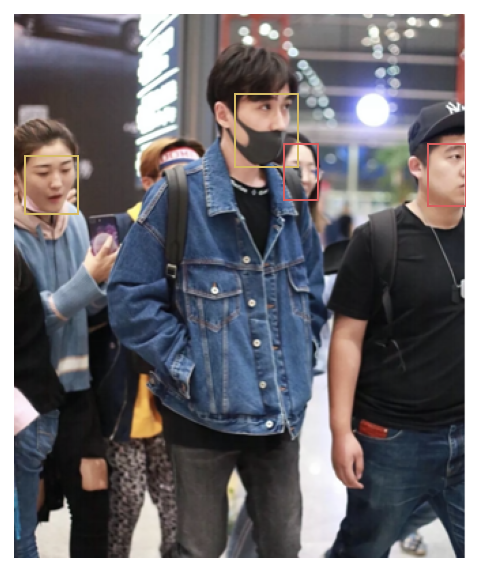

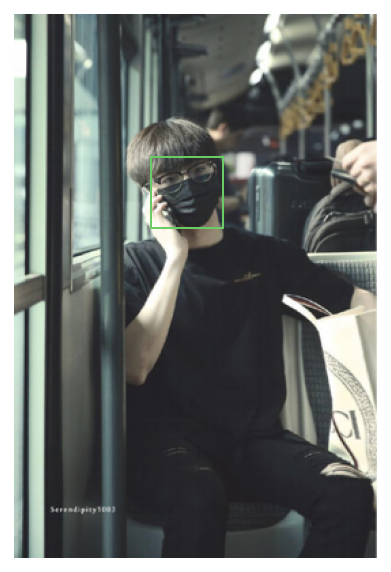

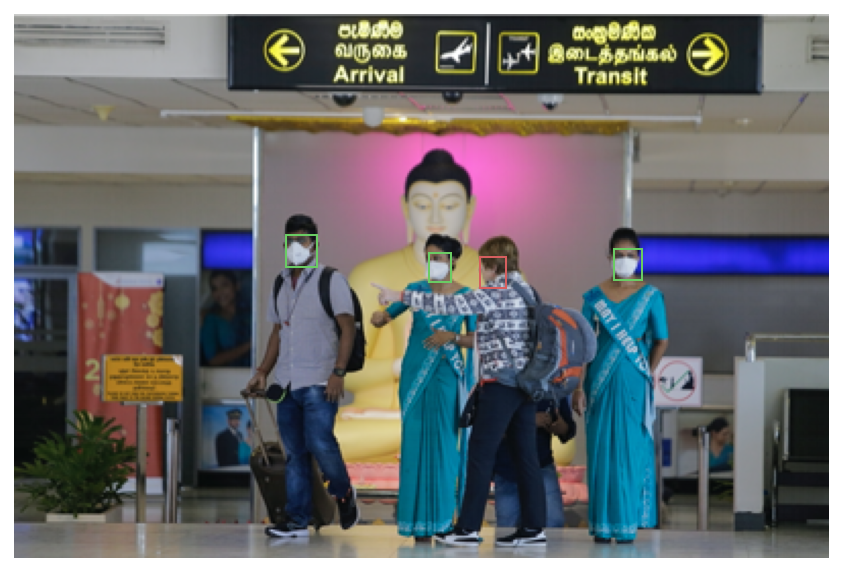

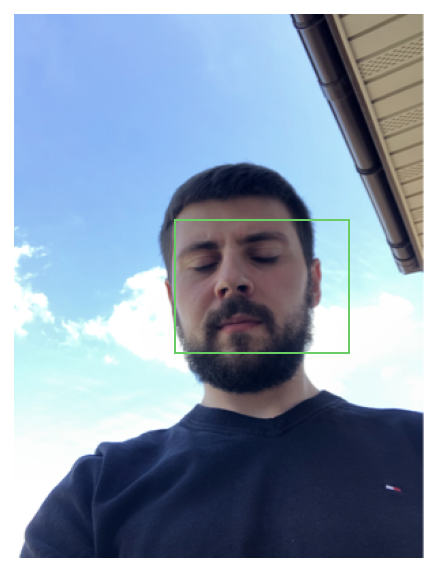

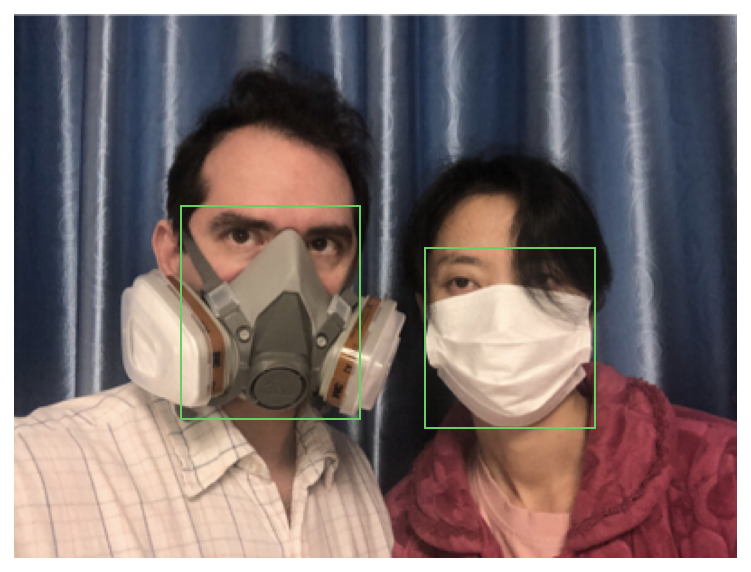

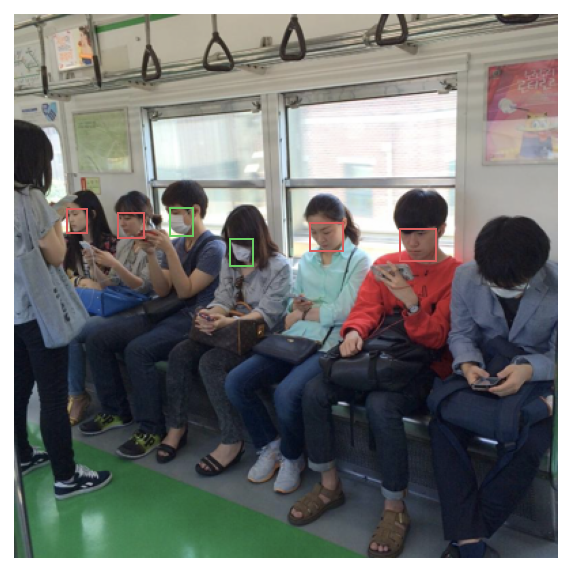

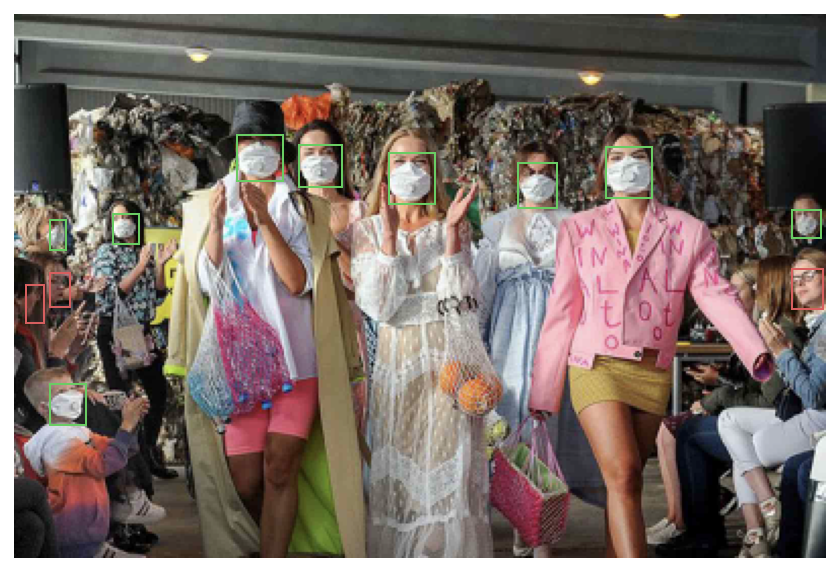

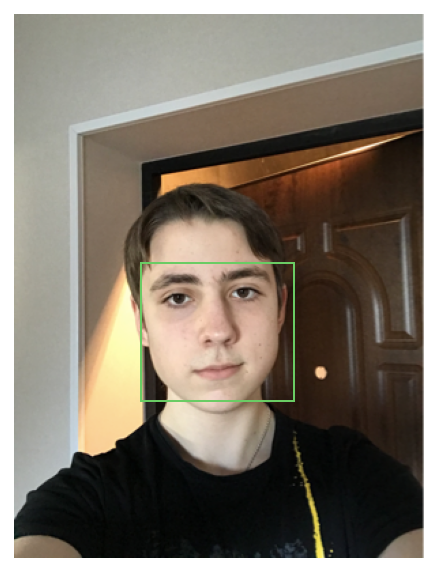

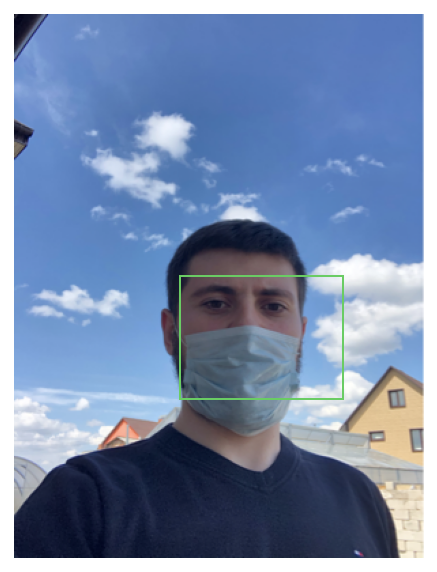

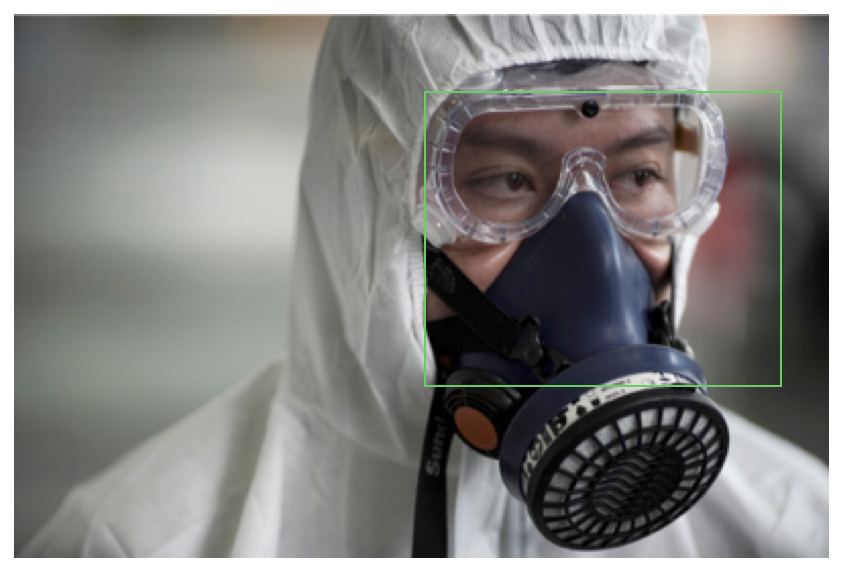

In [97]:
for i in range(15,25):
    draw_bounding_box(imagenames[i])

Create the image dataset and the labels and convert them to pytorch tensors.

In [98]:
def make_dataset(no_of_images): #function to make dataset
    
    image_tensor=[]
    label_tensor=[]
    
    for i,j in enumerate(no_of_images):

        with open(path_an+j[:-4]+".xml") as fd:
            doc = xmltodict.parse(fd.read())

        if type(doc["annotation"]["object"])!=list:
            temp = doc["annotation"]["object"]
            a,b,c,d = list(map(int,temp["bndbox"].values()))
            label = options[temp["name"]]
            image = transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        
        else:
            temp = doc["annotation"]["object"]
            for k in range(len(temp)):
                a,b,c,d=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_im+j).convert("RGB"), b,a,d-b,c-a)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


Use the pytorch dataloarders that we be used later in order to process datas by batch in order to avoid memory overflow.



In [99]:
# importing neccessary libraries for deeplearning task..
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader

my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

# making a dataset
dataset = make_dataset(imagenames) 
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

# Split the dataset between train and testing set
batch_size = 32
trainset,testset = torch.utils.data.random_split(dataset,[train_size,test_size])

# Load data with Pytorch DataLoader
train_loader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=testset,batch_size=batch_size,shuffle=True)

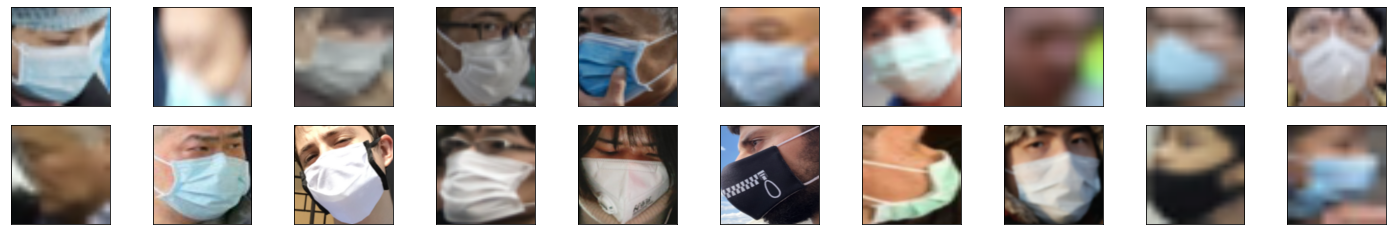

In [12]:
dataiter = iter(train_loader) 
images , labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(images[idx],(1,2,0)))

In [100]:
!pip install geoopt

     |████████████████████████████████| 81kB 7.4MB/s 


In [105]:
import torch.nn as nn
import torch.optim as optim
import geoopt

# We Will use pretrained resnet34 layer model.
resnet = models.resnet18(pretrained=True)
for param in resnet.parameters():
    param.requires_grad=False

# 
n_inputs = resnet.fc.in_features
last_layer = nn.Linear(n_inputs,3)
resnet.fc.out_features = last_layer

if torch.cuda.is_available():
    resnet.cuda()
    
print(resnet.fc.out_features)

if torch.cuda.is_available(): #checking for GPU availability
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

for paramet in resnet.parameters():
    paramet.requires_grad=True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(),lr=0.001)
optim = geoopt.optim.RiemannianAdam(resnet.parameters(), lr=0.0001)

Linear(in_features=512, out_features=3, bias=True)
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [113]:
n_epochs=3

for epoch in range(1,n_epochs+1):

    train_loss = 0.0
    acc_train = 0.0
    print('########################  TRAIN THE MODEL #################')
    for batch,(data,target) in enumerate(train_loader):
    
    
        if torch.cuda.is_available():
            data , target = data.cuda(), target.cuda()
    
        optim.zero_grad()
        output=resnet(data)
        loss=criterion(output,target)
        loss.backward()
        optim.step()
        train_loss += loss.item()

        if batch%20==19:
            print("Epoch {}, batch {}, training loss {}".format(epoch, batch+1,train_loss/20))
        train_loss = 0.0

        _, pred_ = torch.max(output,1)
        predicted_ = pred_.numpy()[:,np.newaxis] if not torch.cuda.is_available() else pred_.cpu().numpy()[:,np.newaxis]
        actual_ = target.numpy()[:,np.newaxis] if not torch.cuda.is_available() else target.cpu().numpy()[:,np.newaxis]
        acc_train += np.sum(predicted_== actual_)/len(target.cpu().numpy())

Average_loss_ = train_loss/len(train_loader)
Average_acc_ = acc_train/len(train_loader)

print("Avg total loss is {:.6f}".format(Average_loss_))
print("Avg accuracy is {:.6f}".format(Average_acc_))

print('#########Testing##########')
test_loss=0.0
acc=0
resnet.eval()

for data,target in test_loader:

    if torch.cuda.is_available():
        data,target=data.cuda(),target.cuda()
    output = resnet(data)
    loss = criterion(output,target)
    test_loss += loss.item()
    _, pred = torch.max(output,1)
    predicted = pred.numpy()[:,np.newaxis] if not torch.cuda.is_available() else pred.cpu().numpy()[:,np.newaxis]
    actual = target.numpy()[:,np.newaxis] if not torch.cuda.is_available() else target.cpu().numpy()[:,np.newaxis]
    acc += np.sum(predicted==actual)/len(target.cpu().numpy())

Average_loss = test_loss/len(test_loader)
Average_acc = acc/len(test_loader)

print("Avg total loss is {:.6f}".format(Average_loss))
print("Avg accuracy is {:.6f}".format(Average_acc))

torch.save(resnet,open("resnet_model_face_mask","wb"))

########################  TRAIN THE MODEL #################
Epoch 1, batch 20, training loss 0.00019466916564851998
Epoch 1, batch 40, training loss 0.00014310595579445363
Epoch 1, batch 60, training loss 0.00010014856234192848
Epoch 1, batch 80, training loss 0.012231405824422836
Epoch 1, batch 100, training loss 0.0069874577224254605
########################  TRAIN THE MODEL #################
Epoch 2, batch 20, training loss 0.00019956978503614663
Epoch 2, batch 40, training loss 0.0009010146372020244
Epoch 2, batch 60, training loss 0.0018253672868013382
Epoch 2, batch 80, training loss 0.01626267284154892
Epoch 2, batch 100, training loss 0.009626611322164535
########################  TRAIN THE MODEL #################
Epoch 3, batch 20, training loss 0.00023960061371326448
Epoch 3, batch 40, training loss 0.00010651078773662447
Epoch 3, batch 60, training loss 0.0002898407867178321
Epoch 3, batch 80, training loss 0.0034852113574743273
Epoch 3, batch 100, training loss 0.0002859506

As you can see the average accuracy is almost perfect on the training set and excellent on the test set. We did not choose to split the data between train/test and validation as we wanted to keep as much data as possible for training in order to maximize the model performances.

Save and reload the pretrained resnet model that will be inserted in a head model, in this case the MTCNN head.

MTCNN is a face detection neural networks of pyramidal architecture  making Non-Max-Suppression and bounding box regression at each stage of the pyramid.

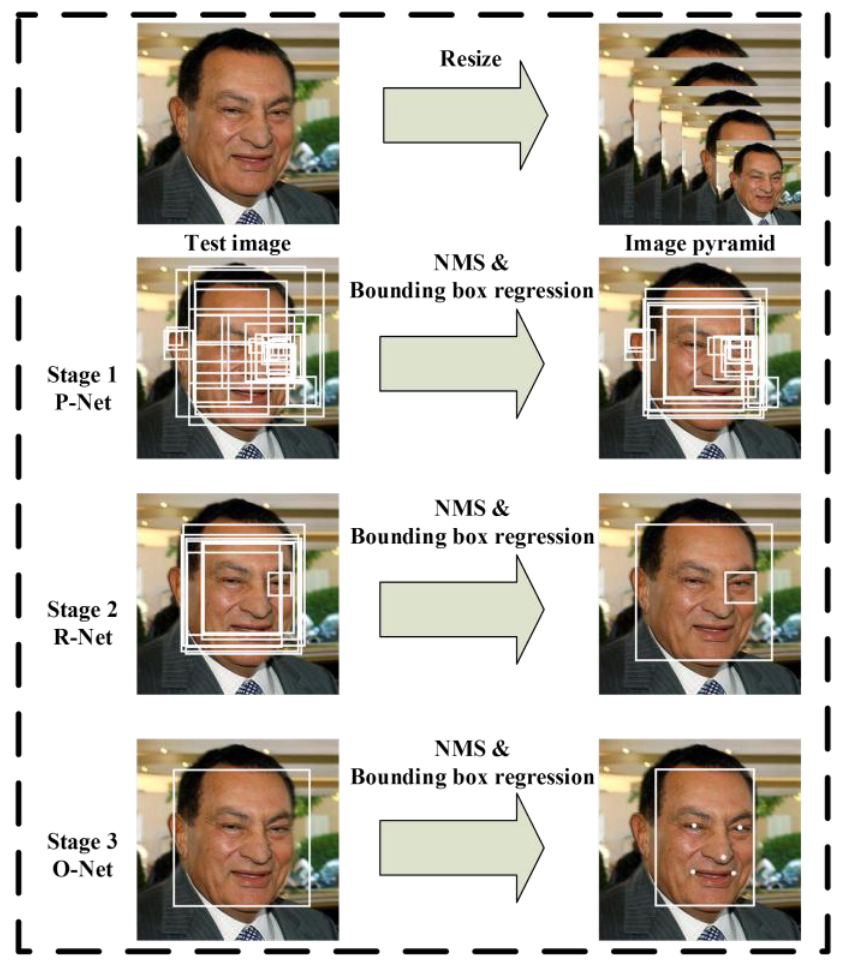

In [114]:
torch.save(resnet,open("resnet_model_face_mask","wb")) # saving the trained model.

In [117]:
device = torch.device("cuda")
model=torch.load(open("resnet_model_face_mask","rb"),map_location=device) #loading the model

In [118]:
!pip install mtcnn #installing library for predicting faces

In [119]:
#https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
from mtcnn import MTCNN
detect = MTCNN()

Create custom function to read, resize crop and convert to pytorch tensors the datas, display them with bounding boxes.

In [120]:
def trans(bndbox,newimage):

    a,b,c,d = bndbox["box"]
    image_crop = transforms.functional.crop(newimage, b,a,d-b,c-a)
    my_transform = transforms.Compose([transforms.Resize((226,226)),
                                     transforms.RandomCrop((224,224)),
                                     transforms.ToTensor()])(image_crop)
                                     
    return my_transform

In [121]:
def tag_plot(bndbox,filepath,predicted):

    configut = ["with_mask","without_mask","mask_weared_incorrect"]
    x = plt.imread(filepath)
    fig,ax = plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(15,10)

    for i,j in zip(bndbox,predicted):
        a,b,c,d = i["box"]
        patch = patches.Rectangle((a,b),c,d, linewidth=1, edgecolor='r', facecolor="none",)
        ax.imshow(x)
        ax.text(a, b, configut[predicted[0]], size=10,
                style='italic', verticalalignment="bottom", horizontalalignment="left",color="blue")
        ax.add_patch(patch)

In [122]:
model = model.eval()

def testing(filepath):

    configut = ["with_mask","without_mask","mask_weared_incorrect"]
    img = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    newimage = Image.open(filepath).convert("RGB")
    bndbox = detect.detect_faces(img)

    if len(bndbox) == 1:
        image_pred = trans(bndbox[0],newimage).unsqueeze(0)
        _, pred = torch.max(model(image_pred.to(device)),1)
        tag_plot(bndbox,filepath,predicted=pred)
    
    else:
        predicted=[]
        for i in bndbox:
            image_pred=trans(i,newimage).unsqueeze(0)
            _, pred=torch.max(model(image_pred.to(device)),1)
            predicted.append(pred)
        tag_plot(bndbox,filepath,predicted)

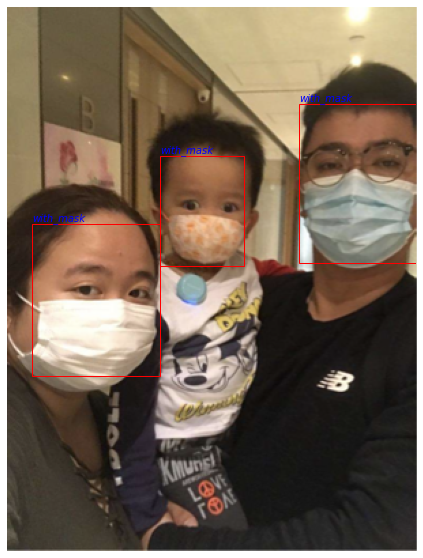

In [28]:
testing(path_im+imagenames[118]) # if you have images you can test them using this function..

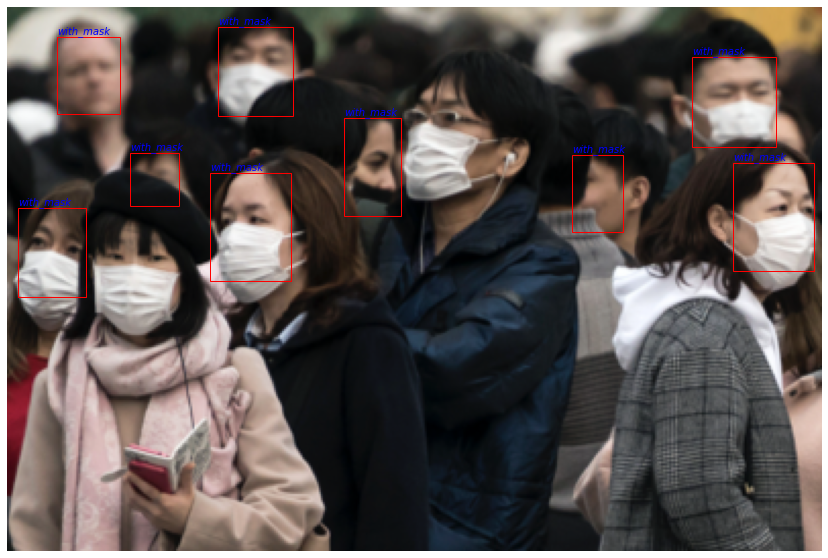

In [30]:
testing(path_im+imagenames[158])